In [61]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import ffmpeg

In [62]:
class Creature(Agent):
    def __init__(self, unique_id, model, traits=None):
        super().__init__(unique_id, model)
        self.traits = traits if traits is not None else [model.random.random() for _ in range(3)]  # Use random() for a single random number
        self.environment_factor = model.random.uniform(0, 1)

    def step(self):
        # Example: Simple evolutionary process with environmental influence
        neighbors = self.model.grid.get_neighbors(self.pos, moore=True, include_center=False)
        neighbor_traits = [neighbor.traits for neighbor in neighbors]

        # Calculate average trait values of neighbors
        avg_neighbor_traits = np.mean(neighbor_traits, axis=0) if neighbors else self.traits

        # Calculate the difference between own traits and average neighbor traits
        trait_difference = np.array(avg_neighbor_traits) - np.array(self.traits)

        # Update traits based on a small fraction of the trait difference and environmental factor
        # print(f"Updating traits at step {self.model.schedule.steps}")
        self.traits += 0.1 * trait_difference * self.environment_factor

In [63]:
class EvolutionModel(Model):
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
    
        # Create agents with random initial traits
        for i in range(self.num_agents):
            agent = Creature(i, self)
            x = np.random.choice(self.grid.width)
            y = np.random.choice(self.grid.height)
            self.grid.place_agent(agent, (x, y))
            self.schedule.add(agent)

        # DataCollector to track traits and environmental factors over time
        self.datacollector = DataCollector(agent_reporters={"x": lambda a: a.pos[0], 
                                                            "y": lambda a: a.pos[1], 
                                                            "Trait1": lambda a: a.traits[0], 
                                                            "Trait2": lambda a: a.traits[1], 
                                                            "Trait3": lambda a: a.traits[2], 
                                                            "Environment Factor": "environment_factor"})

    def step(self):
       # print(f"Collecting data at step {self.schedule.steps}")
       self.datacollector.collect(self)
       # print(f"Advancing to step {self.schedule.steps + 1}")
       self.schedule.step()

In [64]:
# Run the model for a certain number of steps
N_steps = 555 # Increase this to get a longer time series
N_agents = 1000
width = 50
height = 50
model = EvolutionModel(N_agents, width, height)
for i in range(N_steps):
    model.step()
# print(f"Number of steps in the model: {model.schedule.steps}")
# Extract and visualize data collected during the simulation
agent_data = model.datacollector.get_agent_vars_dataframe()
# print(f"Number of rows in agent_data: {len(agent_data)}")
# print(agent_data)
# Get data for the last step
last_step_data = agent_data.xs(N_steps-1, level="Step")

# Unstack the data for plotting
unstacked_data = last_step_data.unstack()

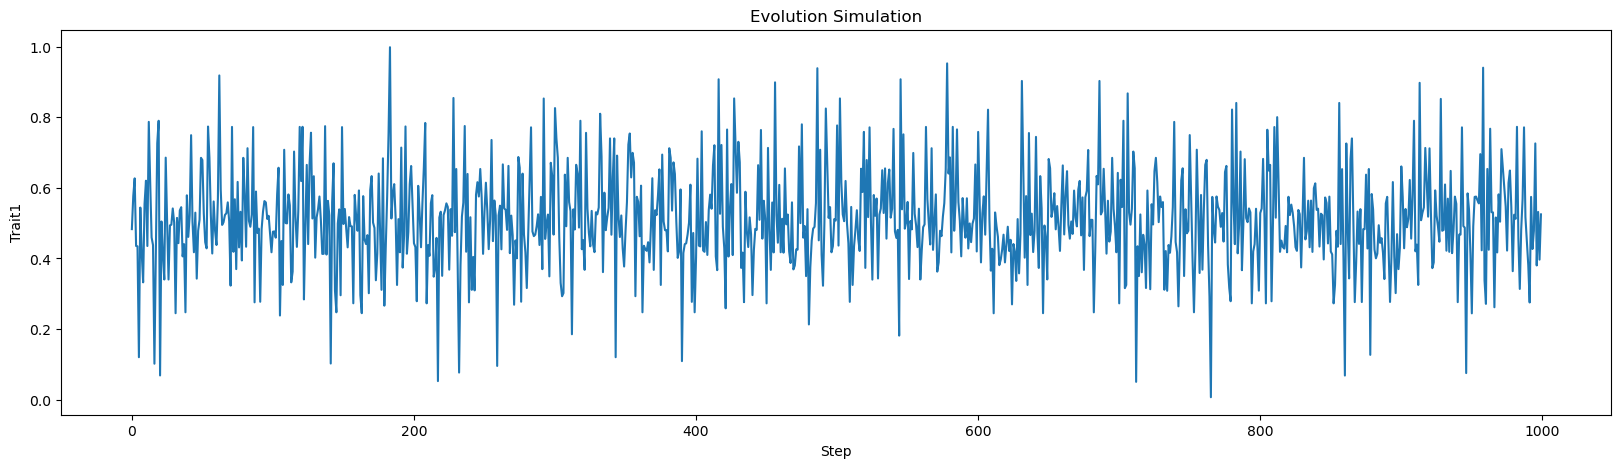

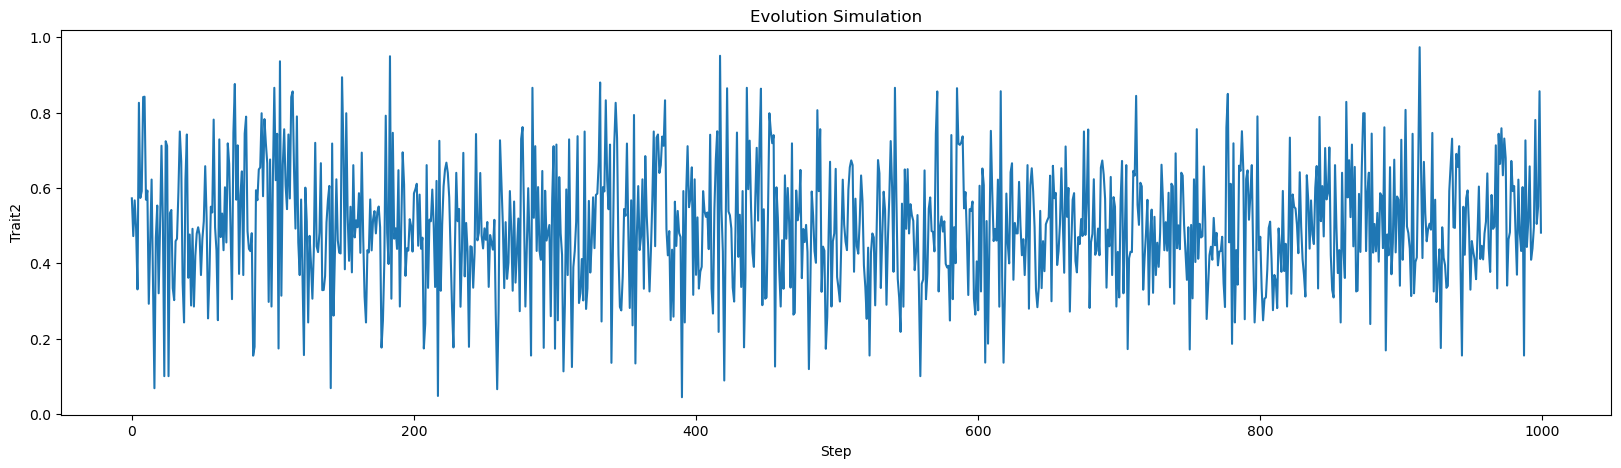

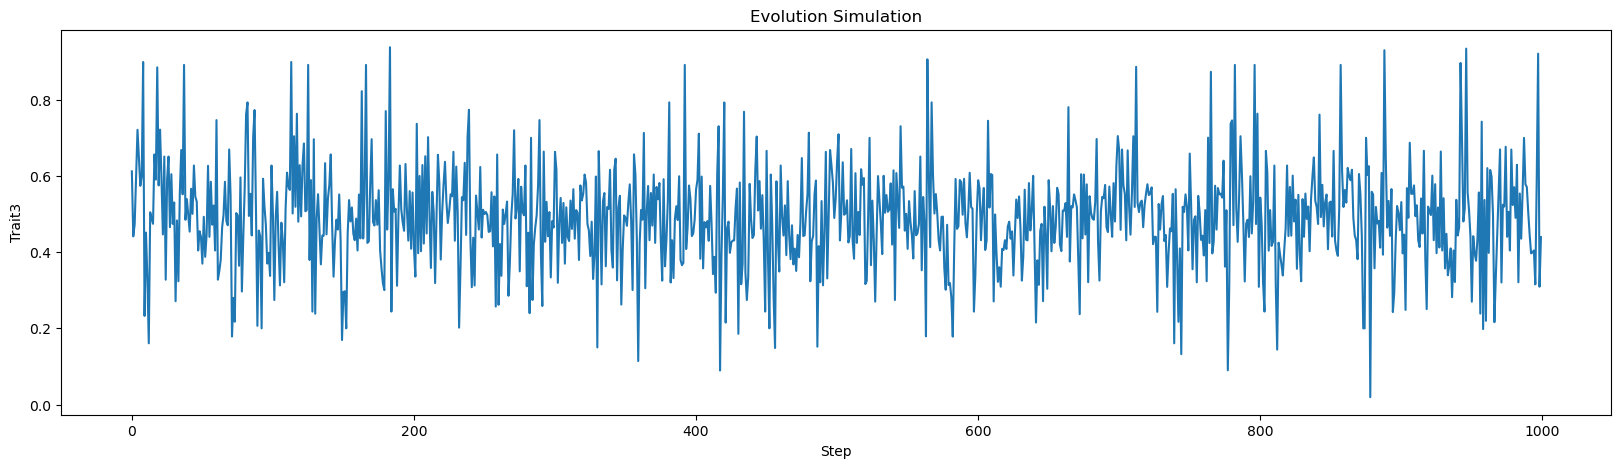

In [65]:
# Plot each trait separately
for trait in ["Trait1", "Trait2", "Trait3"]:
    plt.figure(figsize=(20, 5))
    unstacked_data[trait].plot()
    plt.xlabel('Step')
    plt.ylabel(trait)
    plt.title('Evolution Simulation')
    # plt.show()

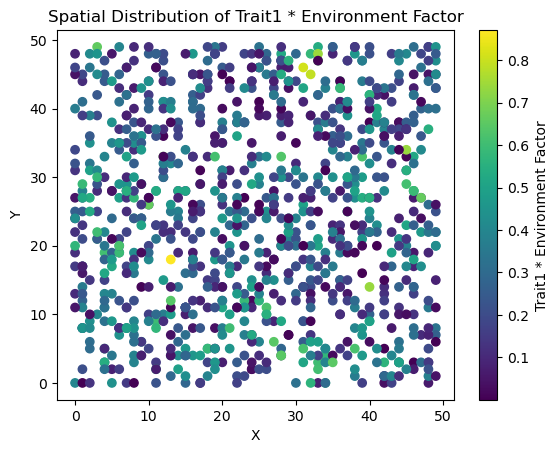

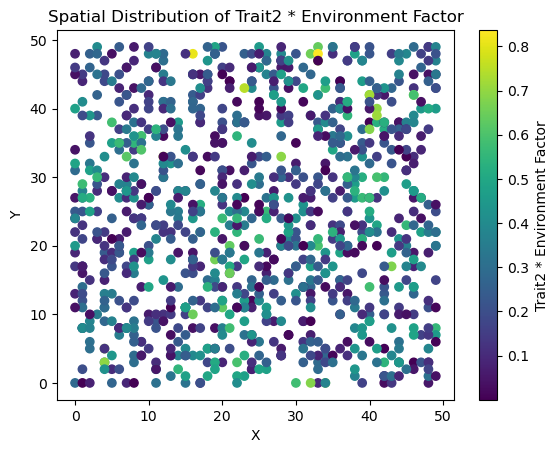

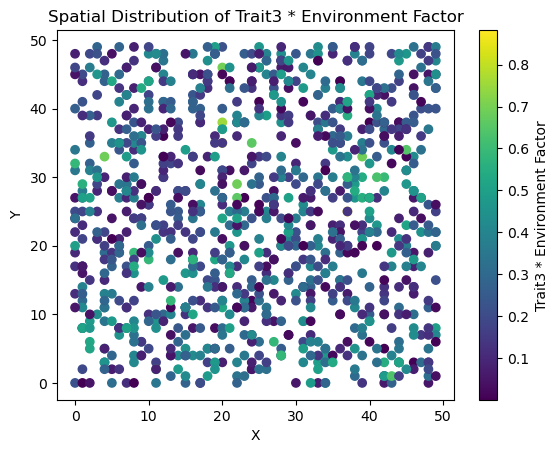

In [66]:
# Visualize the spatial distribution of traits and environmental factors in the last step
for trait in ["Trait1", "Trait2", "Trait3"]:
    fig, ax = plt.subplots()
    sc = ax.scatter(last_step_data["x"], last_step_data["y"],c=last_step_data[trait].values * last_step_data["Environment Factor"].values,cmap='viridis')
    plt.colorbar(sc, label=f'{trait} * Environment Factor')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Spatial Distribution of {trait} * Environment Factor')
    plt.show()

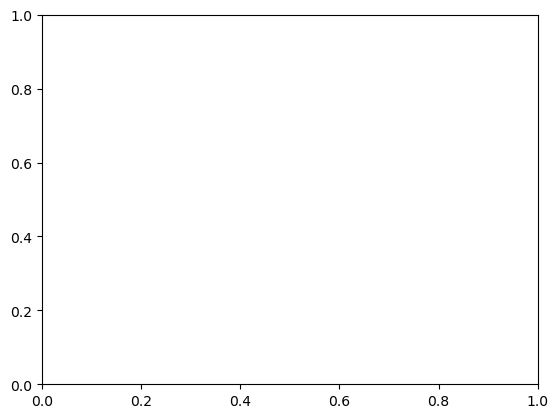

In [82]:
# Function to update the plot
fig, ax = plt.subplots()
def update(i):
    print(i)
    fig.clear()
    step_data = agent_data.xs(i, level="Step")
    # print(f"Plotting data for step {i}")
    # print(step_data)
    # print(f"Number of rows in step_data: {len(step_data)}")
    # print(f"Number of unique agents in step_data: {len(step_data.index.unique())}")
    # print(f"Number of unique x values in step_data: {len(step_data.x)}")
    # print(f"Number of unique y values in step_data: {len(step_data.y)}")
    # print(f"Number of unique Trait1 values in step_data: {len(step_data.Trait1)}")
    # print(f"Number of unique Trait2 values in step_data: {len(step_data.Trait2)}")
    # print(f"Number of unique Trait3 values in step_data: {len(step_data.Trait3)}") 
    # print(f"Number of unique Environment Factor values in step_data: {len(step_data['Environment Factor'].unique())}")
    ax = fig.add_subplot(111)
    sc_local = ax.scatter(step_data["x"], step_data["y"], c=step_data[f"Trait3"].values * step_data["Environment Factor"].values, cmap='viridis')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Spatial Distribution Step {i} trait 3')
    sc_local.set_offsets(np.column_stack((step_data["y"], step_data["x"])))
    cbar = fig.colorbar(sc_local, ax=ax, label = f'Trait 3 * Environment Factor')
    
    

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


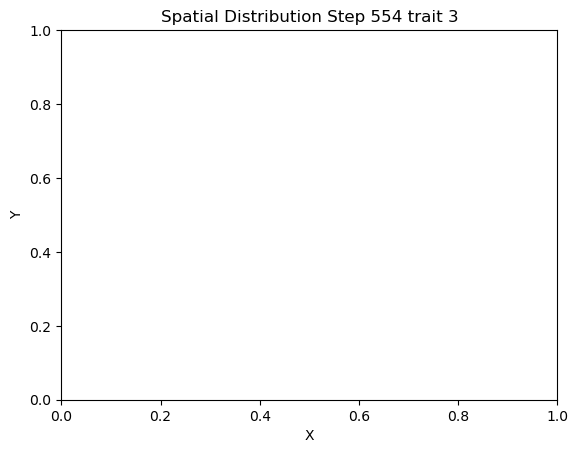

In [83]:
# Create an animation
ani = FuncAnimation(fig, update, frames = N_steps, repeat=True)

# Save the animation as a video file
ani.save('trait3.mp4', writer='ffmpeg')